In [1]:
!pip install sweetviz
!pip install ppscore

**Importing Libraries**

In [2]:
import pandas as pd
import numpy as np
import sweetviz as sv
import ppscore as pps
import seaborn as sns
from pandas import read_csv
from numpy import set_printoptions
from matplotlib import pyplot
%matplotlib inline
sns.set_palette('husl')
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold
from sklearn.tree import  DecisionTreeClassifier
from sklearn.linear_model import ElasticNet 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')

**Importing Dataset**

In [3]:
data = pd.read_csv("bankruptcy-prevention.csv",sep=';')

In [4]:
data

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
...,...,...,...,...,...,...,...
245,0.0,1.0,1.0,1.0,1.0,1.0,non-bankruptcy
246,1.0,1.0,0.5,1.0,1.0,0.0,non-bankruptcy
247,0.0,1.0,1.0,0.5,0.5,0.0,non-bankruptcy
248,1.0,0.0,0.5,1.0,0.5,0.0,non-bankruptcy


**The data set includes the following variables:
industrial_risk: 0=low risk, 0.5=medium risk, 1=high risk.
management_risk: 0=low risk, 0.5=medium risk, 1=high risk.
financial flexibility: 0=low flexibility, 0.5=medium flexibility, 1=high flexibility.
credibility: 0=low credibility, 0.5=medium credibility, 1=high credibility.
competitiveness: 0=low competitiveness, 0.5=medium competitiveness, 1=high competitiveness.
operating_risk: 0=low risk, 0.5=medium risk, 1=high risk.
class: bankruptcy, non-bankruptcy (target variable).
**

**We need to have LOW(industrial risk,management risk,operating risk) and HIGH(financial flexibility,credibility,competitiveness) in ordere to avoid Bankruptcy**

In [5]:
data.tail(10)

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
240,0.0,1.0,0.5,0.5,0.5,0.0,non-bankruptcy
241,1.0,0.0,0.5,0.5,0.5,1.0,non-bankruptcy
242,0.0,1.0,0.5,0.5,0.5,1.0,non-bankruptcy
243,0.0,1.0,1.0,1.0,1.0,0.0,non-bankruptcy
244,1.0,0.0,1.0,1.0,1.0,1.0,non-bankruptcy
245,0.0,1.0,1.0,1.0,1.0,1.0,non-bankruptcy
246,1.0,1.0,0.5,1.0,1.0,0.0,non-bankruptcy
247,0.0,1.0,1.0,0.5,0.5,0.0,non-bankruptcy
248,1.0,0.0,0.5,1.0,0.5,0.0,non-bankruptcy
249,1.0,0.0,0.5,0.5,1.0,1.0,non-bankruptcy


In [6]:
type(data)
data.shape

(250, 7)

**250rows and 7 columns including one target variable**

In [7]:
#data types
data.dtypes

industrial_risk           float64
 management_risk          float64
 financial_flexibility    float64
 credibility              float64
 competitiveness          float64
 operating_risk           float64
 class                     object
dtype: object

**Here is no need to change any datatype as all of them are of float 64**

In [8]:
data.isnull().sum()

industrial_risk           0
 management_risk          0
 financial_flexibility    0
 credibility              0
 competitiveness          0
 operating_risk           0
 class                    0
dtype: int64

**Here all the columns **

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   industrial_risk         250 non-null    float64
 1    management_risk        250 non-null    float64
 2    financial_flexibility  250 non-null    float64
 3    credibility            250 non-null    float64
 4    competitiveness        250 non-null    float64
 5    operating_risk         250 non-null    float64
 6    class                  250 non-null    object 
dtypes: float64(6), object(1)
memory usage: 13.8+ KB


**as we can see all here are non-null values hence we dont require coerce**

In [10]:
labelencoder = LabelEncoder()
data.iloc[:, -1] = labelencoder.fit_transform(data.iloc[:,-1])

**Using Label Encoder at a categorical column to get binary value as its a classification project
**

In [11]:
data

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,0
1,0.0,1.0,0.0,0.0,0.0,1.0,0
2,1.0,0.0,0.0,0.0,0.0,1.0,0
3,0.5,0.0,0.0,0.5,0.0,1.0,0
4,1.0,1.0,0.0,0.0,0.0,1.0,0
...,...,...,...,...,...,...,...
245,0.0,1.0,1.0,1.0,1.0,1.0,1
246,1.0,1.0,0.5,1.0,1.0,0.0,1
247,0.0,1.0,1.0,0.5,0.5,0.0,1
248,1.0,0.0,0.5,1.0,0.5,0.0,1


**OUTLIER DETECTION AND DATA VISUALIZATION**

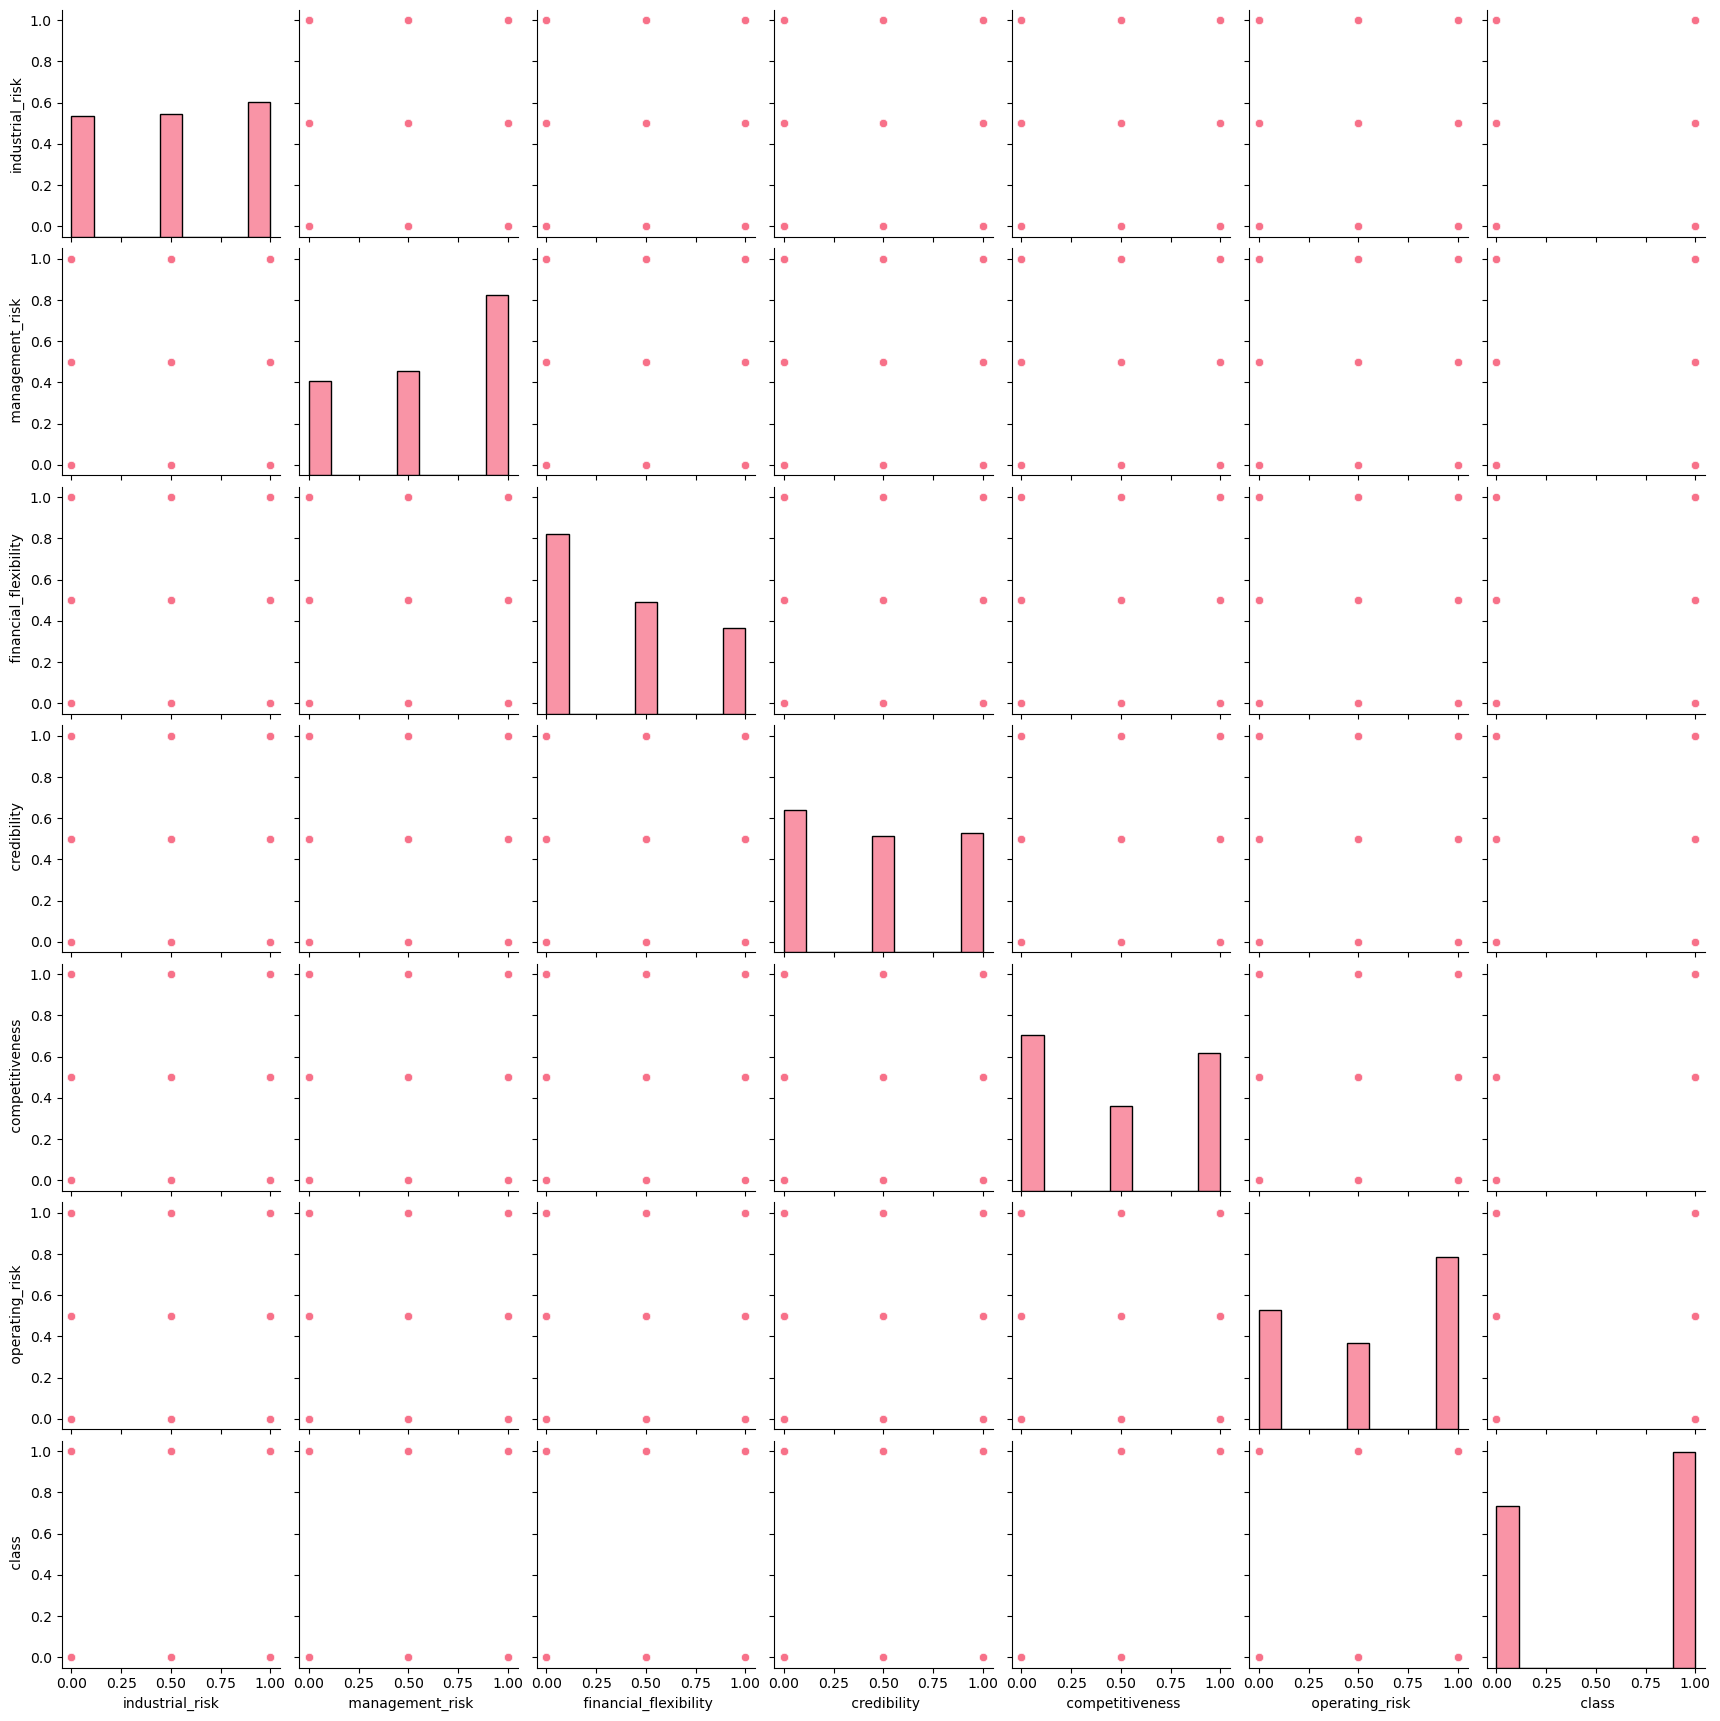

In [12]:

# Create the default pairplot
sns.pairplot(data)

In [13]:
#Correlation

data.corr()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
industrial_risk,1.000000,0.255127,-0.162624,-0.014438,-0.257814,0.144507,-0.227823
management_risk,0.255127,1.000000,-0.254845,-0.303341,-0.306568,0.213874,-0.370838
financial_flexibility,-0.162624,-0.254845,1.000000,0.524951,0.686612,-0.116903,0.751020
credibility,-0.014438,-0.303341,0.524951,1.000000,0.675689,-0.288458,0.755909
competitiveness,-0.257814,-0.306568,0.686612,0.675689,1.000000,-0.211383,0.899452
operating_risk,0.144507,0.213874,-0.116903,-0.288458,-0.211383,1.000000,-0.279786
class,-0.227823,-0.370838,0.751020,0.755909,0.899452,-0.279786,1.000000


**IN this correlation matrix we can see no columns are correlated to each other neither input variables**

In [14]:
import matplotlib.pyplot as plt

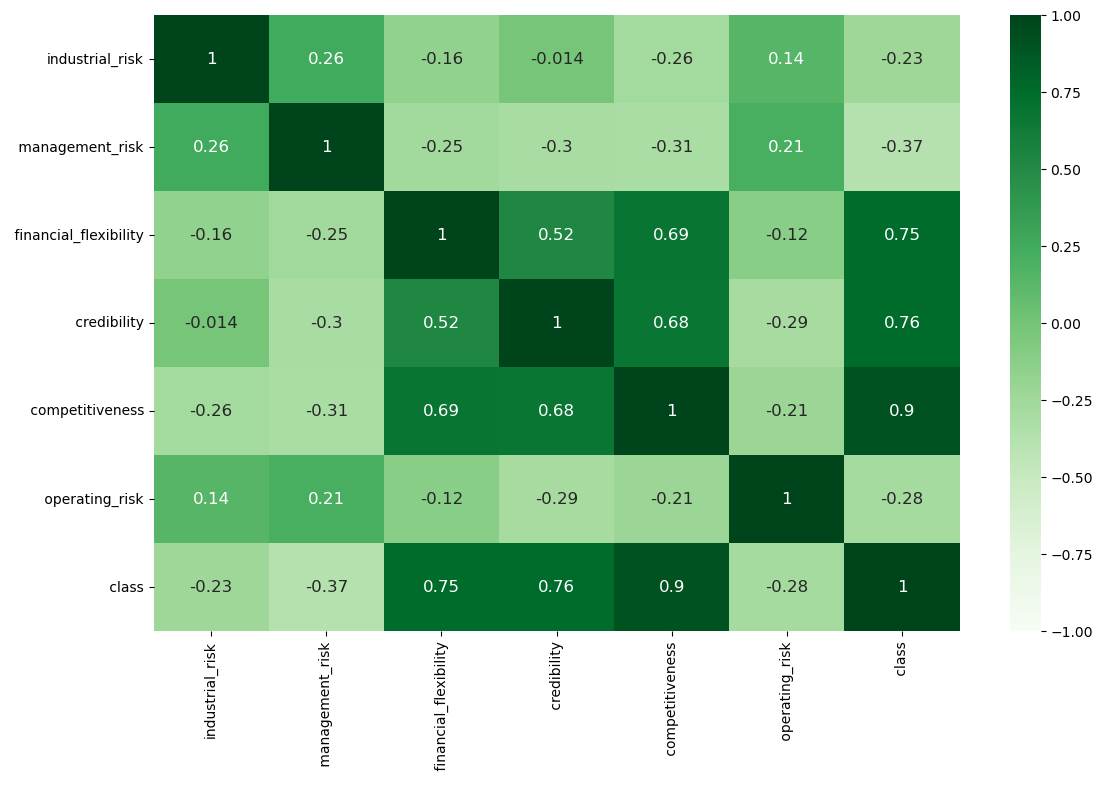

In [15]:
plt.figure(figsize=(13,8))
sns.heatmap(data.corr(),cmap='Greens',vmin=-1,vmax=1,annot=True,annot_kws={'fontsize':12})
plt.show()

**OUTLIER DETECTION USING ISOLATION FOREST**

* Our algoritm can suffer a lot we dont remove the outliers and to avoid this problem we will drop the values**

In [16]:
# training the model
clf = IsolationForest(random_state=10,contamination=.01)
clf.fit(data)
y_pred_outliers = clf.predict(data)
y_pred_outliers

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1

In [17]:
data['scores']=clf.decision_function(data)
data['anomaly']=clf.predict(data.iloc[:,0:7])
data

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class,scores,anomaly
0,0.5,1.0,0.0,0.0,0.0,0.5,0,0.145712,1
1,0.0,1.0,0.0,0.0,0.0,1.0,0,0.179722,1
2,1.0,0.0,0.0,0.0,0.0,1.0,0,0.089607,1
3,0.5,0.0,0.0,0.5,0.0,1.0,0,0.067834,1
4,1.0,1.0,0.0,0.0,0.0,1.0,0,0.215060,1
...,...,...,...,...,...,...,...,...,...
245,0.0,1.0,1.0,1.0,1.0,1.0,1,0.104623,1
246,1.0,1.0,0.5,1.0,1.0,0.0,1,0.091653,1
247,0.0,1.0,1.0,0.5,0.5,0.0,1,0.088232,1
248,1.0,0.0,0.5,1.0,0.5,0.0,1,0.068579,1


In [18]:
#print the anomaly
data[data['anomaly']==-1]

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class,scores,anomaly
27,0.0,0.0,0.0,0.0,0.0,1.0,0,-0.000517,-1
72,1.0,0.5,1.0,0.5,0.0,0.0,0,-0.044748,-1
192,0.5,1.0,0.0,0.0,1.0,0.0,1,-0.002184,-1


**These are the outliers.
Now we will drop them and reset the index**

In [19]:
data = data.drop(data.index[[27, 72, 192]], axis=0)
data.reset_index(drop=True,inplace = True)
data

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class,scores,anomaly
0,0.5,1.0,0.0,0.0,0.0,0.5,0,0.145712,1
1,0.0,1.0,0.0,0.0,0.0,1.0,0,0.179722,1
2,1.0,0.0,0.0,0.0,0.0,1.0,0,0.089607,1
3,0.5,0.0,0.0,0.5,0.0,1.0,0,0.067834,1
4,1.0,1.0,0.0,0.0,0.0,1.0,0,0.215060,1
...,...,...,...,...,...,...,...,...,...
242,0.0,1.0,1.0,1.0,1.0,1.0,1,0.104623,1
243,1.0,1.0,0.5,1.0,1.0,0.0,1,0.091653,1
244,0.0,1.0,1.0,0.5,0.5,0.0,1,0.088232,1
245,1.0,0.0,0.5,1.0,0.5,0.0,1,0.068579,1


**Univariate Histogram**

<function matplotlib.pyplot.show(close=None, block=None)>

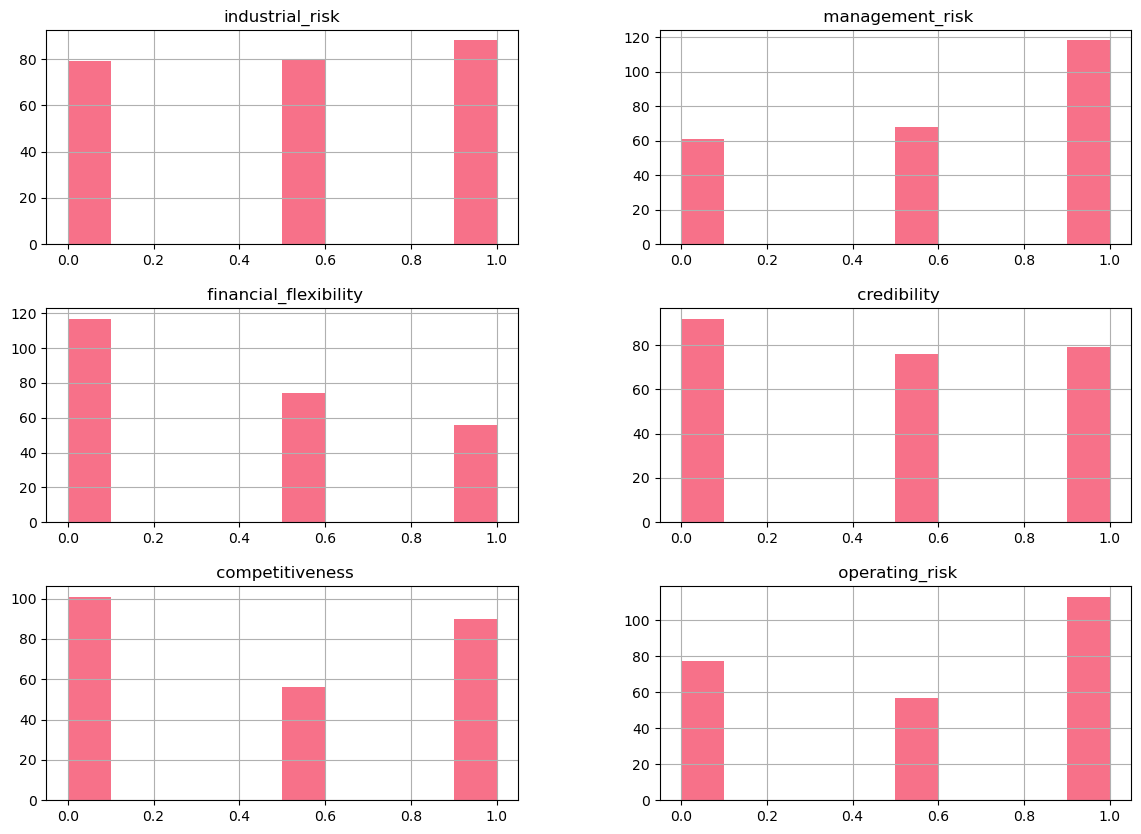

In [20]:
data1=data.iloc[0:,:6]
data1.hist(figsize=(14,10))
pyplot.show

By Looking at this histogram we can say that we have higher risks than credibility and competitiveness

In [21]:
import matplotlib.pyplot as plt

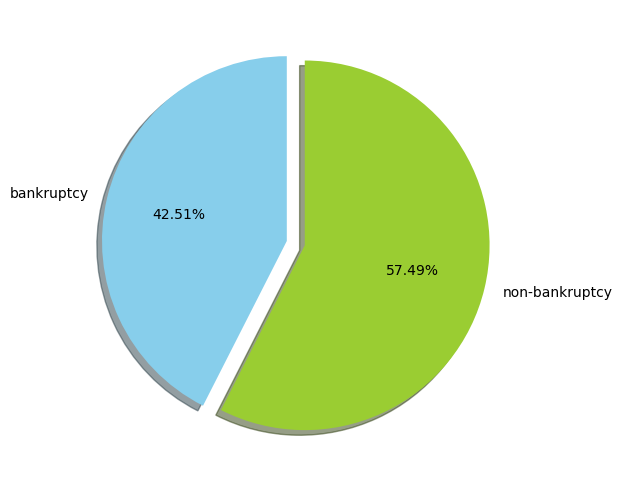

In [22]:
a =data[' class'].value_counts()[0]     #......0 =555
b =data[' class'].value_counts()[1]     #......1 =783


fig1, ax1 = plt.subplots(figsize=(8, 6))
label = ['bankruptcy', 'non-bankruptcy']
count = [a, b]
colors = ['skyblue', 'yellowgreen']
explode = (0, 0.1)  # explode 2nd slice
plt.pie(count, labels=label, autopct='%0.2f%%', explode=explode, colors=colors,shadow=True, startangle=90)
plt.show()

**Recursive Feature Elimination**

In [23]:
array = data.values
X = pd.DataFrame(array[:,0:6])
Y =  pd.DataFrame(array[:,-3])
# feature extraction
model = LogisticRegression(max_iter=400)
rfe = RFE(model, n_features_to_select=4)
fit = rfe.fit(X, Y)

In [24]:
X.columns

RangeIndex(start=0, stop=6, step=1)

In [25]:
fit.support_

array([False,  True,  True,  True,  True, False])

In [26]:
fit.ranking_

array([3, 1, 1, 1, 1, 2])

**By above results we can see that column no-0 and 5 less important as compared to other features but as per our domain knowledge we cant drop those columns.**

In [27]:
from sklearn.ensemble import ExtraTreesClassifier

**PPS SCORE**

In [28]:
data

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class,scores,anomaly
0,0.5,1.0,0.0,0.0,0.0,0.5,0,0.145712,1
1,0.0,1.0,0.0,0.0,0.0,1.0,0,0.179722,1
2,1.0,0.0,0.0,0.0,0.0,1.0,0,0.089607,1
3,0.5,0.0,0.0,0.5,0.0,1.0,0,0.067834,1
4,1.0,1.0,0.0,0.0,0.0,1.0,0,0.215060,1
...,...,...,...,...,...,...,...,...,...
242,0.0,1.0,1.0,1.0,1.0,1.0,1,0.104623,1
243,1.0,1.0,0.5,1.0,1.0,0.0,1,0.091653,1
244,0.0,1.0,1.0,0.5,0.5,0.0,1,0.088232,1
245,1.0,0.0,0.5,1.0,0.5,0.0,1,0.068579,1


In [29]:
data2=data.iloc[:,0:7]

In [30]:
#calculate the whole PPS matrix
pps.matrix(data2)

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,industrial_risk,industrial_risk,1.000000,predict_itself,True,None,0.000000,1.000000,None
1,industrial_risk,management_risk,0.112190,regression,True,mean absolute error,0.362348,0.321696,DecisionTreeRegressor()
2,industrial_risk,financial_flexibility,0.005409,regression,True,mean absolute error,0.350202,0.348308,DecisionTreeRegressor()
3,industrial_risk,credibility,0.000000,regression,True,mean absolute error,0.346154,0.364014,DecisionTreeRegressor()
4,industrial_risk,competitiveness,0.006119,regression,True,mean absolute error,0.386640,0.384274,DecisionTreeRegressor()
5,industrial_risk,operating_risk,0.000604,regression,True,mean absolute error,0.384615,0.384383,DecisionTreeRegressor()
6,industrial_risk,class,0.000000,regression,True,mean absolute error,0.425101,0.466110,DecisionTreeRegressor()
7,management_risk,industrial_risk,0.000000,regression,True,mean absolute error,0.338057,0.347358,DecisionTreeRegressor()
8,management_risk,management_risk,1.000000,predict_itself,True,None,0.000000,1.000000,None
9,management_risk,financial_flexibility,0.040381,regression,True,mean absolute error,0.350202,0.336061,DecisionTreeRegressor()


**as we can see that competitiveness ,credibility and financial flexibility are more important with respect to our target variable class**

# splitting the data

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=1)

**Train Test. split Splitting our dataset into train and test using train_test_split(), what we are doing here is taking 80% of data to train our model, and 20% that we will hold back as a validation dataset:**

# MODEL BUILDING

Different Model Building For Classification

1.Random Forest Classification

2.AdaBoost Classification

3.Logistic Regression

4.K Nearest Neighbour

5.Support Vector Machine (SVM) Classifier

6.Stacking Ensemble for Classification



# Random Forest Classification

In [32]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [33]:
num_trees = 10
# max features: sqrt(n_features)
max_features = 3

kfold = KFold(n_splits=5, shuffle=True, random_state=42)
model_RFC = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
results_RFC = cross_val_score(model_RFC, X, Y, cv=kfold, scoring="accuracy")

print(f'Scores for each fold are: {results_RFC}')
print(f'Average score: {"{:.2f}".format(results_RFC.mean())}')

Scores for each fold are: [1.         1.         1.         1.         0.97959184]
Average score: 1.00


In [34]:
# model fit and validate
model_RFC.fit(X_train, Y_train)
preds = model_RFC.predict(X_test)
print("Training Accuracy: ", model_RFC.score(X_train, Y_train))
print('Testing Accuarcy: ', model_RFC.score(X_test, Y_test))

Training Accuracy:  1.0
Testing Accuarcy:  1.0


In [35]:
print('Classification report for Random Forest model')
f1_rfc = f1_score(Y_test, preds)
precision_rfc = precision_score(Y_test, preds)
recall_rfc = recall_score(Y_test, preds)

print('F1 is: ', f1_rfc)
print('Precision is: ', precision_rfc)
print('Recall is: ', recall_rfc)

Classification report for Random Forest model
F1 is:  1.0
Precision is:  1.0
Recall is:  1.0


# AdaBoost Classification

In [36]:
from sklearn.ensemble import AdaBoostClassifier
num_trees = 10
seed = 7

kfold = KFold(n_splits=5, shuffle=True, random_state=seed)
model_AdB = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
results_AdB = cross_val_score(model_AdB, X, Y, cv=kfold, scoring="accuracy")

print(results_AdB.mean())

1.0


In [37]:
# model fit and validate

model_AdB.fit(X_train, Y_train)
preds = model_AdB.predict(X_test)
print("Training Accuracy: ", model_AdB.score(X_train, Y_train))
print('Testing Accuarcy: ', model_AdB.score(X_test, Y_test))

Training Accuracy:  1.0
Testing Accuarcy:  1.0


In [38]:
f1_adb = f1_score(Y_test, preds)
precision_adb = precision_score(Y_test, preds)
recall_adb = recall_score(Y_test, preds)

print('F1 is: ', f1_adb)
print('Precision is: ', precision_adb)
print('Recall is: ', recall_adb)

F1 is:  1.0
Precision is:  1.0
Recall is:  1.0


# Logistic Regression

In [39]:
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
model_LR = LogisticRegression(random_state= 42)
results_LR = cross_val_score(model_LR, X, Y, cv= kfold, scoring="accuracy")

print(f'Scores for each fold are: {results_LR}')
print(f'Average score: {"{:.2f}".format(results_LR.mean())}')

Scores for each fold are: [1. 1. 1. 1. 1.]
Average score: 1.00


In [63]:
X

,0,1,2,3,4,5
0,0.5,1.0,0.0,0.0,0.0,0.5
1,0.0,1.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,0.0,1.0
3,0.5,0.0,0.0,0.5,0.0,1.0
4,1.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...
242,0.0,1.0,1.0,1.0,1.0,1.0
243,1.0,1.0,0.5,1.0,1.0,0.0
244,0.0,1.0,1.0,0.5,0.5,0.0
245,1.0,0.0,0.5,1.0,0.5,0.0


In [40]:
# model fit and validate

model_LR.fit(X_train, Y_train)
preds = model_LR.predict(X_test)
print("Training Accuracy: ", model_LR.score(X_train, Y_train))
print('Testing Accuarcy: ', model_LR.score(X_test, Y_test))


print('Classification report for Logistic Regression model')
f1_LR = f1_score(Y_test, preds)
precision_LR = precision_score(Y_test, preds)
recall_LR = recall_score(Y_test, preds)

print('F1 is: ', f1_LR)
print('Precision is: ', precision_LR)
print('Recall is: ', recall_LR)

Training Accuracy:  1.0
Testing Accuarcy:  1.0
Classification report for Logistic Regression model
F1 is:  1.0
Precision is:  1.0
Recall is:  1.0


# K Nearest Neighbour

In [41]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# Grid Search for Algorithm Tuning

n_neighbors = np.array(range(1,50))
param_grid = dict(n_neighbors=n_neighbors)

model = KNeighborsClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid.fit(X, Y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [42]:
print(grid.best_score_)
print(grid.best_params_)

1.0
{'n_neighbors': 1}


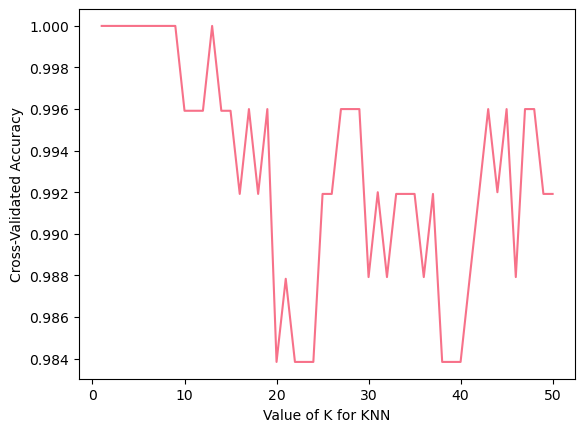

In [43]:
# Visualizing the CV results

k_range = range(1, 51)
k_scores = []

# Use iteration to caclulator different K in models, 
# then return the average accuracy based on the cross validation

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, Y, cv=5)
    k_scores.append(scores.mean())
    
# Plot to see clearly

plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

In [44]:
# Model with tuned parameters, balanced data

model_KNN = KNeighborsClassifier(n_neighbors=1)
results_KNN = cross_val_score(model_KNN, X, Y, cv=kfold, scoring="accuracy")

print(results_KNN.mean())

1.0


In [45]:
model_KNN.fit(X_train, Y_train)
preds = model_KNN.predict(X_test)
print("Training Accuracy: ", model_KNN.score(X_train, Y_train))
print('Testing Accuarcy: ', model_KNN.score(X_test, Y_test))

Training Accuracy:  1.0
Testing Accuarcy:  1.0


In [46]:
print('Classification report for K Nearest Neighbour model')
f1_KNN = f1_score(Y_test, preds)
precision_KNN = precision_score(Y_test, preds)
recall_KNN = recall_score(Y_test, preds)

print('F1 is: ', f1_KNN)
print('Precision is: ', precision_KNN)
print('Recall is: ', recall_KNN)

Classification report for K Nearest Neighbour model
F1 is:  1.0
Precision is:  1.0
Recall is:  1.0


# SUPPORT VECTOR MACHINE (SVM) CLASSIFIER

In [47]:
from sklearn import svm

# Grid Search/hyper parameter Tuning

model = svm.SVC()
param_grid = [{'kernel':['rbf'],'gamma':[50,5,10,0.5],'C':[15,14,13,12,10,0.1,0.001] }]
gsv = GridSearchCV(model, param_grid, cv=5)
gsv.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [15, 14, 13, 12, 10, 0.1, 0.001],
                          'gamma': [50, 5, 10, 0.5], 'kernel': ['rbf']}])

In [48]:
gsv.best_params_ , gsv.best_score_ 

({'C': 15, 'gamma': 0.5, 'kernel': 'rbf'}, 1.0)

In [49]:
# Model with parameters from grid search

kfold = KFold(n_splits=10, shuffle=True, random_state=42)
model_SVM = svm.SVC(C= 15, gamma = 0.5)
results_SVM = cross_val_score(model_SVM, X, Y, cv=kfold, scoring="accuracy")

print(results_SVM.mean())

1.0


In [50]:
model_SVM.fit(X_train, Y_train)
preds = model_SVM.predict(X_test)
print("Training Accuracy: ", model_SVM.score(X_train, Y_train))
print('Testing Accuarcy: ', model_SVM.score(X_test, Y_test))

Training Accuracy:  1.0
Testing Accuarcy:  1.0


In [51]:
print('Classification report for SVM model')
f1_SVM = f1_score(Y_test, preds)
precision_SVM = precision_score(Y_test, preds)
recall_SVM = recall_score(Y_test, preds)

print('F1 is: ', f1_SVM)
print('Precision is: ', precision_SVM)
print('Recall is: ', recall_SVM)

Classification report for SVM model
F1 is:  1.0
Precision is:  1.0
Recall is:  1.0


In [52]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('RFC', RandomForestClassifier()))
models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
results = []
model_names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=18, random_state=1, shuffle=True)
cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
results.append(cv_results)
model_names.append(name)
print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

SVM: 1.000000 (0.000000)


In [53]:
model = SVC(gamma='auto')
model.fit(X_train, Y_train)
prediction = model.predict(X_test)

In [54]:
print(f'Test Accuracy: {accuracy_score(Y_test, prediction)}')
print(f'Classification Report: \n {classification_report(Y_test, prediction)}')

Test Accuracy: 1.0
Classification Report: 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        25
         1.0       1.00      1.00      1.00        25

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



# Stacking Ensemble for Classification

In [55]:
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier

In [56]:
kfold = KFold(n_splits=5, shuffle=True, random_state=7)

# create the sub models
estimators = []
model1 = LogisticRegression(max_iter=100)
estimators.append(('logistic', model1))
model2 = DecisionTreeClassifier()
estimators.append(('cart', model2))
model3 = KNeighborsClassifier(n_neighbors=17)
estimators.append(('knn', model3))

model4 = RandomForestClassifier(n_estimators=10, max_features=3)
estimators.append(('rfc', model4))
model5 = AdaBoostClassifier(n_estimators=10, random_state=7)
estimators.append(('adb', model5))

# create the ensemble model
ensemble_stack = VotingClassifier(estimators)
results_stcking = cross_val_score(ensemble_stack, X, Y, cv=kfold, scoring="accuracy")

print(results_stcking.mean())
#print(results_stcking.itemset())

0.9959183673469388


In [57]:
ensemble_stack.fit(X_train, Y_train)
preds = ensemble_stack.predict(X_test)
print("Training Accuracy: ", ensemble_stack.score(X_train, Y_train))
print('Testing Accuarcy: ', ensemble_stack.score(X_test, Y_test))

Training Accuracy:  1.0
Testing Accuarcy:  1.0


In [58]:
print('Classification report for Stacking Ensemble model')
f1_stacking = f1_score(Y_test, preds)
precision_stacking = precision_score(Y_test, preds)
recall_stacking = recall_score(Y_test, preds)

print('F1 is: ', f1_stacking)
print('Precision is: ', precision_stacking)
print('Recall is: ', recall_stacking)

Classification report for Stacking Ensemble model
F1 is:  1.0
Precision is:  1.0
Recall is:  1.0


In [59]:
# Storing results in a data frame

d1 = {'Models':['Random Forest','Ada Boost','Logistic Regression','KNN','SVM',
                'Stacking ensemble'], 
      'Accuracy':[results_RFC.mean(), results_AdB.mean(), results_LR.mean(), results_KNN.mean(), results_SVM.mean(), 
             results_stcking.mean()],
     'F1_Score':[f1_rfc, f1_adb, f1_LR, f1_KNN, f1_SVM, f1_stacking],
     'Precision':[precision_rfc, precision_adb, precision_LR, precision_KNN, precision_SVM, precision_stacking],
     'Recall':[recall_rfc, recall_adb, recall_LR, recall_KNN, recall_SVM, recall_stacking]}
results_df = pd.DataFrame(d1)
results_df.sort_values(by=['Accuracy'], ascending=False)

,Models,Accuracy,F1_Score,Precision,Recall
1,Ada Boost,1.000000,1.0,1.0,1.0
2,Logistic Regression,1.000000,1.0,1.0,1.0
3,KNN,1.000000,1.0,1.0,1.0
4,SVM,1.000000,1.0,1.0,1.0
0,Random Forest,0.995918,1.0,1.0,1.0
5,Stacking ensemble,0.995918,1.0,1.0,1.0


# model validation

In [60]:
# Using K-fold validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [61]:
kfold_GNB = cross_val_score(model_LR,X,Y, cv=5)
print("K-fold validation score of Logistic Regression is",kfold_GNB.mean())

kfold_KNN = cross_val_score(model_KNN,X,Y, cv=5)
print("K-fold validation score of KNN is",kfold_KNN.mean())

kfold_svm = cross_val_score(model_SVM,X,Y, cv=5)
print("K-fold validation score of SVM is",kfold_svm.mean())

kfold_RF = cross_val_score(model_RFC,X,Y, cv=5)
print("K-fold validation score of Random forest is",kfold_RF.mean())

kfold_adaboost = cross_val_score(model_AdB,X,Y, cv=5)
print("K-fold validation score of Adaboost is",kfold_adaboost.mean())

kfold_stack = cross_val_score(ensemble_stack,X,Y, cv=5)
print("K-fold validation score of Stacking is",kfold_stack.mean())

K-fold validation score of Logistic Regression is 1.0
K-fold validation score of KNN is 1.0
K-fold validation score of SVM is 1.0
K-fold validation score of Random forest is 1.0
K-fold validation score of Adaboost is 1.0
K-fold validation score of Stacking is 1.0


In [62]:
# pickling the model 
import pickle 
pickle_out = open("model_LR.pkl", "wb") 
pickle.dump(model_LR, pickle_out) 
pickle_out.close()